# Module 1 - Basic Summations, Errors, and Intro to NumPy

## Goals
* Write a set of functions that calculate commonly used mathematical expressions ($e^x$ and $\pi$) using basic python constructs
* Learn about convergence and cancellation errors

## Tools we need
* Python for loops and if statemets
* Python functions
* Basic error assesment
* Dive into NumPy

## How do we tell python to calculate $e^x$ ?

Recursive algorithm using Taylor sum:

\begin{align}
e^x &= 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \dots \\
    &= \sum_{n=0}^{\infty}\frac{x^n}{n!}
\end{align}

<div class="span alert alert-success">
<h2> Programming challenge </h2>
Write a simple code that calculates $e^x$ using 100 terms of the Taylor sum. Use the built-in python factorial math function, `from math import factorial`, and a for loop, `for n in range(start,stop,step):`. Print the result to screen using the python `print` function. 
</div>

In [18]:
# Example for computing and writing the sum of consecutive factorials 
from math import factorial          # import the factorial function from the built-in python math module
sum = 0.0                           # declare the variable that will store the sum and set it to 0
N = 10                              # the number of terms in our sum
for n in range(1,N):                # use a for loop to iterate over a sequential range from 1 to N
    sum = sum + factorial(n)        # call the factorial function that we imported earlier

    print(sum)                      # print the current value of sum

1.0
3.0
9.0
33.0
153.0
873.0
5913.0
46233.0
409113.0


>TIP: If you want to learn more about the usage of a python function or its syntax, you can use the help command. For example to learn about the `range` command type `help(range)` in a code cell and execute it:

In [ ]:
help(range)

In [19]:
## write your own code here to compute exp(x) ##
# note that in python raising a number to a power uses a special syntax
# 2 to the power of 3 in python is written as 2**3

from math import factorial          # import the factorial function from the built-in python math module 
N = 100                             # Number of terms in the summation
sum = 1.0                           # Initial value of the summation, n=0 term
x = 5.0                             # exponent
for n in range(1,N):                # for loop that iterates over the values from 1 to N
    sum = sum + x**n/factorial(n)

print(sum)                          # this print statement is outside the loop

148.41315910257657


<div class="span alert alert-success">
<h2> Programming challenge </h2>
Convert the code above into a function that calculates $e^x$ for any x, `myexp(x)`.
</div>

In [20]:
# Example of a function that computes the square of a number
def myfunc(x):
    c = x*x
    return c

print(myfunc(3))

9


In [21]:
## write your own code here ##
def myexp(x, N=100):          # the second input value is given with a default value
    sum = 1
    nterm = 1
    for n in range(1,N):
        nterm *= x/n          # shorthand for nterm = nterm * x/n
        sum += nterm          # shorthand for sum = sum + nterm
    return sum

print(myexp(1.0,10))
print(myexp(1.0))

2.7182815255731922
2.7182818284590455


### Let's compare our function with python's built-in function
We can plot the value of our function and compare to the built-in one in the `numpy` library using the `matplotlib` library. The easiest way to get started making plots with `matplotlib` is to import the `pylab` module 

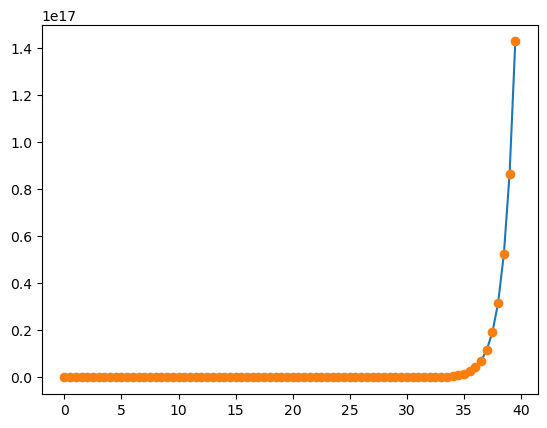

In [22]:
import numpy as np                   # when importing a library you can give it a shorthand name using the as syntax
from matplotlib import pylab as plt  # here we are only importing a subset of the matplotlib functions

x = np.arange(0,40,0.5)              # create a numpy array of values from 0 to 40 in increments of 0.1 for plotting
plt.plot(x, myexp(x))                # create a plot using the first input as the x-values and the second input as the y-values
plt.plot(x, np.exp(x), 'o')          # create plot using filled circles and no line

### How quickly does the function converge to a reasonable value?
We can analyze the convergence of the Taylor sum by calculating the value of $e^x$ for different number of terms.
<div class="span alert alert-success">
<h2> Programming challenge </h2>
Redefine your function `myexp(x)` so that it takes an additional input value, `myexp(x, N)`, that determines the number of terms in the sum.
</div>

In [23]:
## write your own code here ##
def myexp(x, N = 100):       # we can set the default values of input parameters that may be optional
    sum = 1
    nterm = 1
    for n in range(1,N):
        nterm *= x/n
        sum += nterm
    return sum
print(myexp(1.0))
print(myexp(1.0, 10))
print(myexp(1.0, 2))

2.7182818284590455
2.7182815255731922
2.0


We can explore the convergence more thoroughly with a plot:

Text(0, 0.5, 'Value of e')

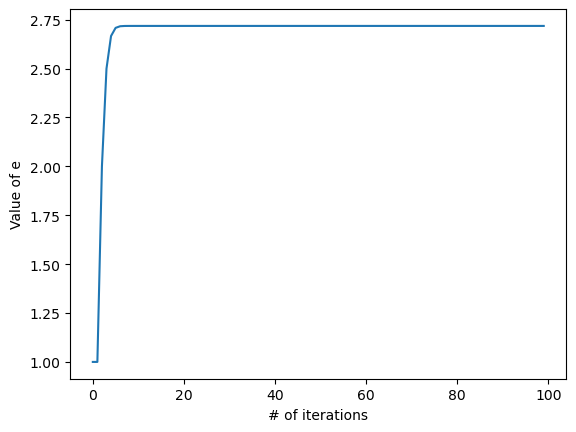

In [24]:
N = np.arange(100)             
approx_exp = np.zeros(100)      # Create an empty (all values set to zero) 1D numpy array with 100 elements
x = 1.0
for n in N:
    approx_exp[n] = myexp(x, n)

plt.figure()                    # Create a new figure for your plot, otherwise in some cases your new lines will simply be added to the previous plot created
plt.plot(N, approx_exp)
plt.xlabel('# of iterations')
plt.ylabel('Value of e')

### What about negative exponents, $e^{-x}$?
<div class="span alert alert-success">
<h2> Programming challenge </h2>
Create a plot comparing the values obtained for your function `myexp(x,N)` to python's built-in function for negative values of $x$ from 0 to -40.
</div>

Text(0, 0.5, 'exp(-x)')

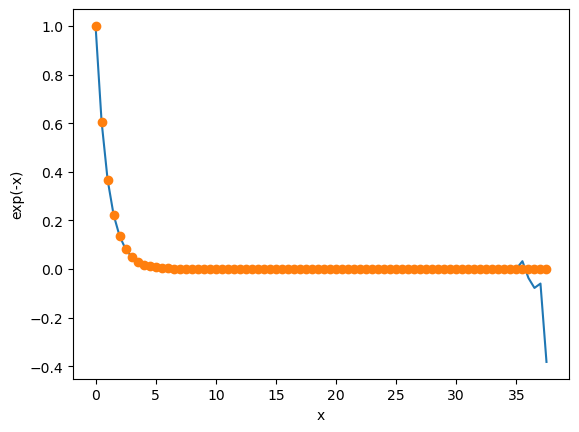

In [25]:
## write your own code here ##
x = np.arange(0,38,0.5)        # Create a numpy array of values from 0 to 40 in increments of 0.1 for plotting
plt.figure()                   # Create a new plot. If we ommit this, the new lines will be added to the prev. plot
plt.plot(x, myexp(-x))
plt.plot(x, np.exp(-x), 'o')
plt.xlabel('x')
plt.ylabel('exp(-x)')

#### Why does our $e^{-x}$ function fail for large values of $x$?

The Taylor sum for $e^{-x}$ has terms with alternating sign

\begin{equation}
e^{-x} = 1 - x + \frac{x^2}{2!} - \frac{x^3}{3!} + \frac{x^4}{4!} \dots \\
\end{equation}

When calculating $e^{-x}$ for large $x$, we have very large terms that sum up to a very small number. At some point the sum runs into the limits of the fixed precission numbers, which results in a **subtractive cancellation** error. How can we correct this?

Text(0, 0.5, 'exp(-x)')

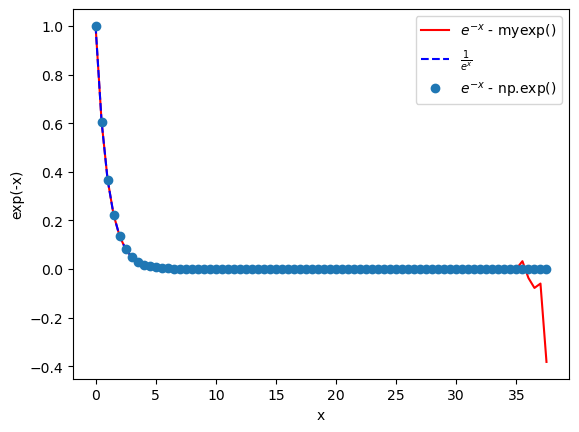

In [26]:
# Use 1/e^x instead!
x = np.arange(0,38,0.5)
plt.figure()
plt.plot(x, myexp(-x), 'r-', label=r'$e^{-x}$ - myexp()')
plt.plot(x, 1.0/myexp(x), 'b--', label=r'$\frac{1}{e^x}$')
plt.plot(x, np.exp(-x), 'o', label=r'$e^{-x}$ - np.exp()')
plt.legend()
plt.xlabel('x')
plt.ylabel('exp(-x)')

## Computing $\pi$

We can use a recursive algorithm with a finite sum just as we did for computing $e^x$. There are two well known formulas for this:

**Leibniz accelerated summation**

\begin{equation}
\pi = 4 \sum_{n=1}^\infty \frac{(-1)^{n+1}}{2n-1}
\end{equation}

Gottfried Wilhelm Leibniz 1646-1716
<img src="http://upload.wikimedia.org/wikipedia/commons/6/6a/Gottfried_Wilhelm_von_Leibniz.jpg" width=150px>

**Sharp summation**

\begin{equation}
\pi = \sum_{n=0}^\infty \frac{2(-1)^{n}3^{1/2-n}}{2n+1}
\end{equation}

Abraham Sharp 1653-1742
<img src="http://upload.wikimedia.org/wikipedia/commons/4/43/Sharp_Abraham.jpg" width=150px>

<div class="span alert alert-success">
<h2> Programming challenge </h2>
Write two functions, `leibniz(N)` and `sharp(N)`, that compute $\pi$ using the corresponding recursive relations with $N$ iterations. 
</div>

In [27]:
# Example
def leibniz(N):
    '''Compute pi via an accelerated Leibniz summation.'''    # String text shown when using help(function)
    lpi = 0.0
    for n in range(1,N):
        if (n % 2):                # % is the modulus operator, yields the remainder of division by the given number
            sign = 1
        else:
            sign = -1
        lpi += 1.0*sign/(2*n-1)
    return 4.0*lpi

help(leibniz)

print(leibniz(100))

Help on function leibniz in module __main__:

leibniz(N)
    Compute pi via an accelerated Leibniz summation.

3.1516934060711166


In [28]:
## write your own code here ##
def sharp(N):
    '''Compute pi via the Sharp summation.'''
    spi = 0.0
    for n in range(N):
        if (n % 2):
            sign = -1
        else:
            sign = 1
        num = 2*sign*3**(0.5-n)
        denom = 2*n+1
        spi += num/denom
    return spi

help(sharp)

print(sharp(100))

Help on function sharp in module __main__:

sharp(N)
    Compute pi via the Sharp summation.

3.1415926535897936


### How quickly do these approximations converge to the exact value?
<div class="span alert alert-success">
<h2> Programming challenge </h2>
Create a plot comparing the values obtained by your recursive functions, `leibniz(N)` and `sharp(N)` to numpy's built-value of $\pi$, `np.pi`.
</div>

Text(0, 0.5, 'Value of $\\pi$')

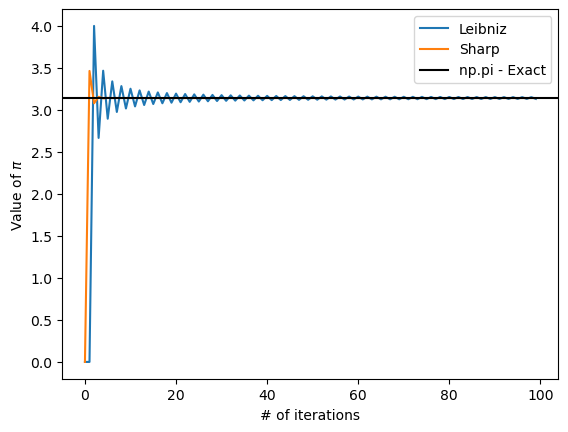

In [29]:
terms = 100
N = np.arange(terms)             
lpi = np.zeros(terms)
spi = np.zeros(terms)

for n in N:
    lpi[n] = leibniz(n)
    spi[n] = sharp(n)

## write your own code here ##
plt.figure()
plt.plot(N, lpi, label = 'Leibniz')
plt.plot(N, spi, label = 'Sharp')
plt.axhline(y=np.pi, color='k', label = 'np.pi - Exact')
plt.legend()
plt.xlabel('# of iterations')
plt.ylabel(r'Value of $\pi$')

## Basic error assessment

How do we assess if our recurring algorithms have approach a satisfactory value?

### 1. Check error with respect to a known quantity
\begin{equation}
    \mathrm{\% \> Error} = 100 \times\left| \frac{\mathrm{approx}- \mathrm{exact}}{\mathrm{exact}} \right|
\end{equation}

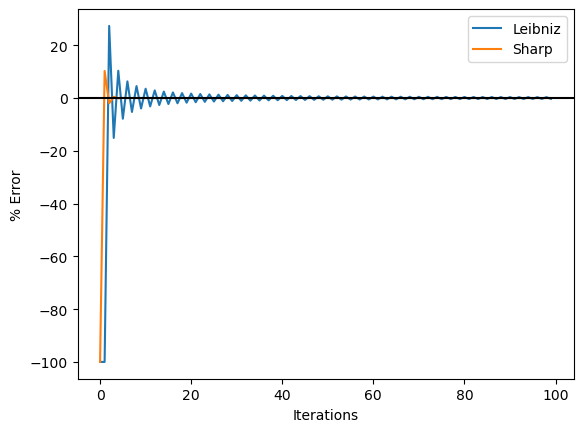

In [30]:
plt.figure()
plt.plot(N, 100*(lpi - np.pi)/np.pi, label = 'Leibniz')
plt.plot(N, 100*(spi - np.pi)/np.pi, label = 'Sharp')
plt.axhline(y=0, color='k')
plt.xlabel('Iterations')
plt.ylabel('% Error')
plt.legend()

### 2. Check convergence of algorithm as number of terms increases

What if we don't know the exact solution? We can see how much each consecutive term differs from the previous one.

\begin{equation}
    \epsilon(n) = \left| \frac{f(n)-f(n-1)}{f(n)} \right|
\end{equation}

<div class="span alert alert-success">
<h2> Programming challenge </h2>
<br/>
Create a plot that shows the relative error after each iteration for all three methods up to 100 iterations.
</div>

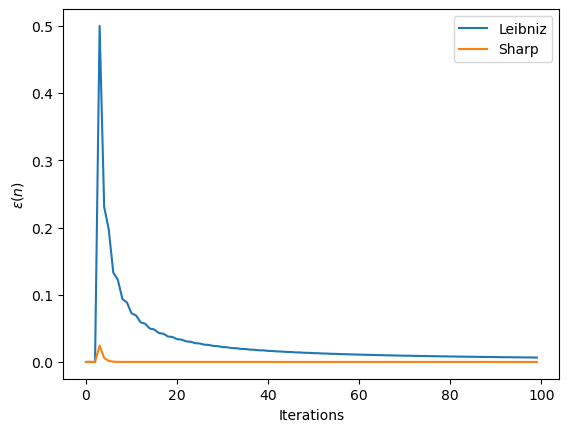

In [31]:
start = 3
terms = 100
N = np.arange(terms)             
lpi_eps = np.zeros(terms)
spi_eps = np.zeros(terms)

## insert yout code here ##
for n in range(start, terms):
    lpi_eps[n] = np.abs((leibniz(n) - leibniz(n-1))/leibniz(n))
    spi_eps[n] = np.abs((sharp(n) - sharp(n-1))/sharp(n))

plt.figure()
plt.plot(N, lpi_eps, label = 'Leibniz')
plt.plot(N, spi_eps, label = 'Sharp')
plt.xlabel('Iterations')
plt.ylabel(r'$\epsilon(n)$')
plt.legend()

## Dive into NumPy

NumPy is a very powerful numerical package for python that provides the following:

- **Optimized N-dimensional arrays (not limited to just numbers)**
    * Creation of arrays from data (lists or tuples) or prefilled arrays
    * Advanced indexing and selection
    * Array manipulation (e.g., resize, sort, transpose, etc...)
    * Basic array calculations (e.g., min, max, sum, mean, var, etc...)
- **Optimized mathematical functions (e.g., exp, log, sin, etc...)**
    * Numpy functions work on scalars as well as numpy arrays
- **Linear algebra**
    * Matrix and vector products
    * Norms
    * Decompositions
    * Eigenvalues and solving equations
- **Basic input and output of simple text and binary files**
- **Fourier transforms**
- **Random sampling (random number generator and distributions)**
- **Basic statistics**
- **And much more!!!**

### Defining NumPy arrays

In [ ]:
x = np.array((0,2,4,5,5,8,10,20)) # create a Numpy array from a list of numbers
y = np.array(((0.4,3.6,1.1,25.6),(7.5,2.5,6.78,10.0))) # create a Numpy array from a list of numbers
z = np.zeros(10) # create a numpy array of size 10 that is full of zeros
zz = np.ones((5,10)) # create a numpy array fo size 5x10 full of ones

In [ ]:
print('Properties of x')
print(x)                          # all values in the array
print(type(x))                    # python type
print(x.dtype)                    # ndarray data type
print(len(x))                     # length of the array
print(x.shape)                    # shape of the array
print(np.shape(x))

print('\nProperties of y')
print(y)                          # all values in the array
print(type(y))                    # python type
print(y.dtype)                    # ndarray data type
print(len(y))                     # length of the array
print(y.shape)                    # shape of the array

print('\nProperties of z')
print(z)                          # all values in the array
print(type(z))                    # python type
print(z.dtype)                    # ndarray data type
print(len(z))                     # length of the array
print(z.shape)                    # shape of the array

print('\nProperties of zz')
print(zz)                          # all values in the array
print(type(zz))                    # python type
print(zz.dtype)                    # ndarray data type
print(len(zz))                     # length of the array
print(zz.shape)                    # shape of the array

### Indexing and slicing NumPy arrays

In [ ]:
print(x[0])                       # element 0 in the array

x[0] = 1                          # set element 0 to a new value
print(x[0])    

x[0] = 1.7                        # ndarray type is integer, so numpy will use FLOOR(value) if it is a float
print(x[0])

# Array slicing - The basic slice syntax is i:j:k where i is the starting index, j is the stopping index,
# and k is the step

# Negative i and j are interpreted as n + i and n + j where n is the number of elements in the corresponding
# dimension. Negative k makes stepping go towards smaller indices.


print(x[:])                       # all elements in the array
print(x[1:5])                     # elements 1-4 (end index is non-inclusive)
print(x[:-1])                     # all elements up the second to last one
print(x[::2])                     # every other element in the array starting at 0th element

print("\nIndexing and slicing 2D array y")
print(y[:])                       # all elements in the array
print(y[:,0])                     # all rows for column 0
print(y[:,1:])                    # all rows for columns 1 to last

### Basic array transformations

In [ ]:
x = np.array((0,2,4,5,5,8,10,20))
print(x.shape)
x = x.reshape((2,4))
print(x.shape)

y = y.transpose()
print(y.shape)

y = y.flatten()
print(y.shape)

y = y.reshape((2,4))
print(y.shape)

In [ ]:
x *= 10                           # element by element scaling by a factor
print(x)

y -= 5                            # element by element subtraction
print(y)

a = x*y                           # element by element multiplication - arrays must have the same size
print(a)

### Optimized mathematical functions (e.g., exp, log, sin, etc...)

In [ ]:
print(np.sin(0.5))                 # sine of a scalar quantity
print(np.sin(y))                   # element by element calculation of sine

### Linear Algebra

In [ ]:
x = np.array((0,0,1.0))
y = np.array((0,1.0,1.0))
z = np.dot(x,y)
print(z)

### Basic input and output of simple text and binary files

In [ ]:
np.savetxt('file.txt', x)
y = np.loadtxt('file.txt')
print(y)
#help(np.loadtxt)
#help(np.savetxt)

### Basic string formatting
We often want to print information for screen output and/or to a file in the form of text and variables. Python is very flexible and offers many different options. One way to do this is through the Python string formatter `format()` (see https://docs.python.org/3.6/library/string.html for more details). The following examples show some basic usage:

In [ ]:
# Print to standard output
print("The sum of {0} + {1} = {2}".format(5, 7, 5+7))
print("x = {0:d} is a decimal, y = {1:f} is a float, and z = {2:e} uses scientific notation".format(1, 6.453, 1E-3))
print("y = {0:6.3f} is a float with width 6 and 3 significant digits".format(6.45373674))

In [ ]:
# Print to file
# note the nextline character, \n , at the end of each line. This adds a line break after each line is written
f = open('workfile.txt', 'w')
f.write("The sum of {0} + {1} = {2}\n".format(5, 7, 5+7))
f.write("x = {0:d} is a decimal, y = {1:f} is a float, and z = {2:e} uses scientific notation\n".format(1, 6.453, 1E-3))
f.write("y = {0:6.3f} is a float with width 6 and 3 significant digits\n".format(6.45373674))
f.close()

### Numpy help

* Jupyter notebook `Help->NumPy` (takes you to https://docs.scipy.org/doc/numpy/reference)
* NumPy User Guide - https://docs.scipy.org/doc/numpy/user/index.html
* NumPy Quickstart Tutorial - https://docs.scipy.org/doc/numpy/user/quickstart.html